# Projet Machine learning : Letter recognition

### Prétraitement et visualisation des données

On importe les packages nécessaires

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [8]:
data = pd.read_csv("letter-recognition.data", header = None)
data.shape

(20000, 17)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


La base de données est composée de 20 000 observations et de 17 variables, listées ci-dessus :

- **lettr** : Majuscules (26 valeurs de A à Z)
 
- **x-box** : Position horizontale de la boîte (entier)
 
- **y-box** : Position verticale de la boîte Y (entier)
 
- **width** : Largeur de la boîte (entier)
 
- **high** : Haute hauteur de la boîte (entier)
 
- **onpix** : Nombre total de pixels (entier)
 
- **x-bar** : Moyenne de x sur les pixels dans la boîte (entier)
 
- **y-bar** : Moyenne de y sur les pixels dans la boîte (entier)
 
- **x2bar** : Moyenne x de variation (entier)
 
- **y2bar** : Moyenne y de variance (entier)
 
- **xybar** : Moyenne x y corrélation (entier)
 
- **x2ybr** : Moyenne de x * x * y (entier)

- **xy2br** : Moyenne de x * y * y (entier)

- **x-ege** : Nombre moyen d’arêtes de gauche à droite (entier)

- **xegvy** : Corrélation de x-ege avec y (entier)

- **y-ege** : Nombre moyen d’arêtes de bas en haut (entier)
  
- **yegvx** : Corrélation de y-ege avec x (entier)

Afin de faciliter la lecture de la base de données et la visualisation, on renomme les colonnes par leurs vrais noms

In [12]:
data.columns = ["lettr", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", 
                "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", 
                "yegvx"]

In [13]:
data.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


#### Statistiques descriptives

On se propose de regarder les statistiques descriptives de cette base de données afin de se donner une idée de la dispersion des données.

In [16]:
data.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


On compte le nombre d'occurences de chaque lettre.

In [18]:
data['lettr'].value_counts()

lettr
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [19]:
data["lettr"].value_counts(normalize=True)

lettr
U    0.04065
D    0.04025
P    0.04015
T    0.03980
M    0.03960
A    0.03945
X    0.03935
Y    0.03930
N    0.03915
Q    0.03915
F    0.03875
G    0.03865
E    0.03840
B    0.03830
V    0.03820
L    0.03805
R    0.03790
I    0.03775
O    0.03765
W    0.03760
S    0.03740
J    0.03735
K    0.03695
C    0.03680
H    0.03670
Z    0.03670
Name: proportion, dtype: float64

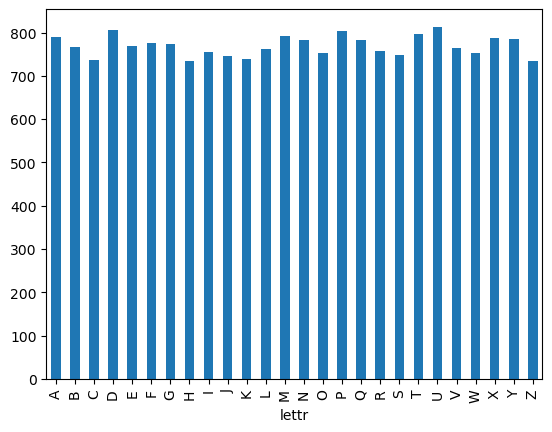

In [20]:
data["lettr"].value_counts().sort_index().plot(kind="bar")
plt.show()

Puis on regarde la proportion de chaque lettre et nous remarquons qu'elle est a peu près la même pour chaque lettre.

In [22]:
data["lettr"].value_counts().describe()

count     26.000000
mean     769.230769
std       23.174655
min      734.000000
25%      752.250000
50%      767.000000
75%      786.750000
max      813.000000
Name: count, dtype: float64

<Axes: >

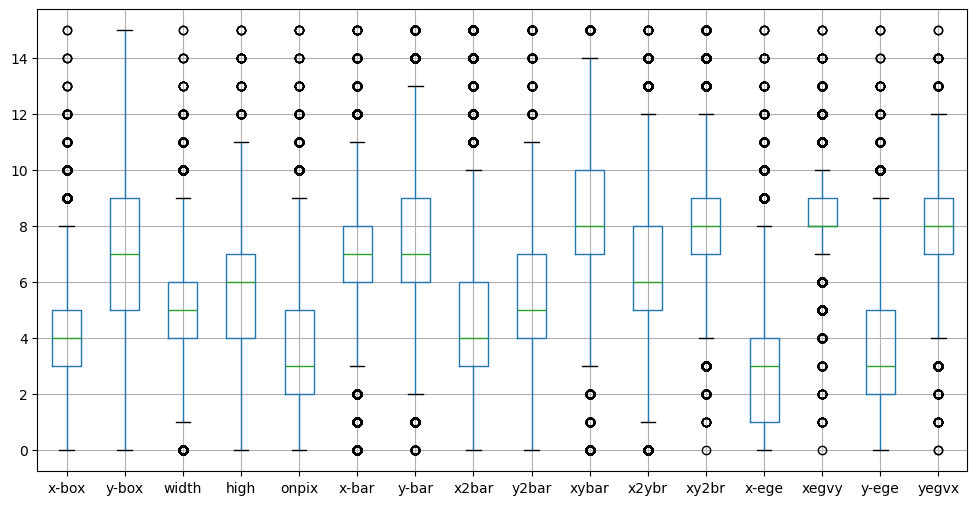

In [23]:
data.drop(columns="lettr").boxplot(figsize=(12, 6))

On regarde maintenant les boites à moustaches de chaque variable de la base. On constate que les distributions des variables présentent des niveaux et des dispersions hétérogènes, avec une asymétrie majoritairement à droite et de nombreux outliers. Cela reflète la diversité morphologique des lettres manuscrites

### Corrélations

On propose maintenant de regarder les corrélations entre les variables numériques de la base de données (16). Dans un premier temps avec toutes les lettres confondues, sans faire de distinction.

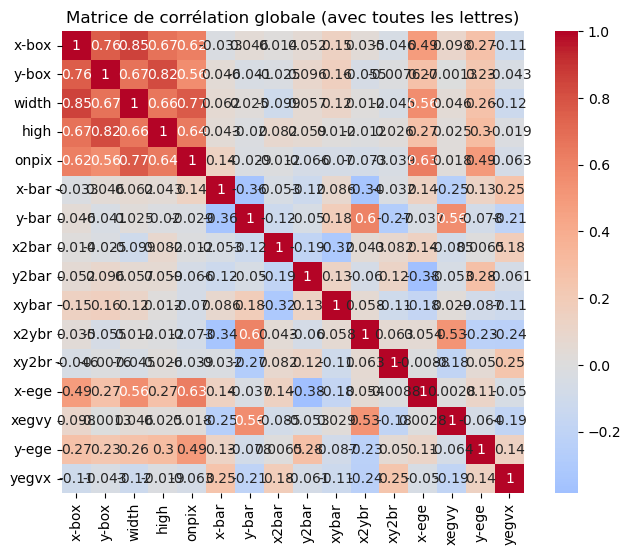

In [27]:
corr_global = data.drop(columns="lettr").corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_global,
    cmap="coolwarm",
    center=0,
    annot = True,
    square=True
)
plt.title("Matrice de corrélation globale (avec toutes les lettres)")
plt.show()

On constate de fortes corrélations entre les variables : **x-box** , **y-box** , **width**, **high** et **onpix**. Cela peut s’expliquer par le fait que ces variables décrivent toutes la taille et la densité globale de la lettre. Ainsi, cette redondance est structurelle et reflète la construction des variables, pas les données elles-mêmes.

En dehors du groupe de variables décrivant la taille et la densité globale de la lettre, les corrélations restent globalement faibles. Cela reflète la complémentarité des variables, conçus pour capturer des aspects différents de la structure des lettres. Ceci justifie entre autre l'utilisation de l'ACP plus bas.

Maintenant, on se propose de comparer la matrice de corrélation d'une seule lettre avec la matrice de corrélation globale (avec toutes les lettres). Le but étant de mettre en lumière les différences significatives. Puisqu'une matrice de corrélation permet de décrire la structure de dépendance d'une variable, le fait de comparer une matrice de corrélation d'une lettre avec une matrice de corrélation globale (avec toutes les lettre) permet de mettre en avant les lettre atypiques, les variables discriminantes ou encore les causses possibles de  confusions entre variables. Ainsi, pour comparer cette matrice de corrélation d'une lettre avec la matrice de corrélation globale, on fait la différence :

Pour chaque lettre atypique $L$ : $\Delta_{diff} = \Delta_{L} - \Delta_{global}$.

Ainsi, chaque coefficient devient un écart et est interprété de cette façon :

- $\Delta > 0 $ : corrélation plus forte que la moyenne

- $\Delta < 0$ : corrélation plus faible (voire inversée)

- $\Delta \simeq 0$ : comportement standard

Le soucis ici, c'est que l'on a 26 lettres et visualiser 26 matrices de corrélation est illusible ... Ainsi, on se propose de regarder les trois lettres les plus atypiques. Pour se faire une utiliser une distance entre deux matrices appelé **norme de Frobenius** (matrice de corrélation d'une lettre vs matrice de corrélation globale) qui calcule le score d'une lettre qui mesure à quel point sa structure de corrélation diffère du global.

La norme de Frobenius est définie par : $\left\| D \right\|_F = \sqrt{{D_{i,j}}^2}$
Plus le score est élevé est plus la lettre est structurellement atypique sinon la lettre est proche du comportement moyen.

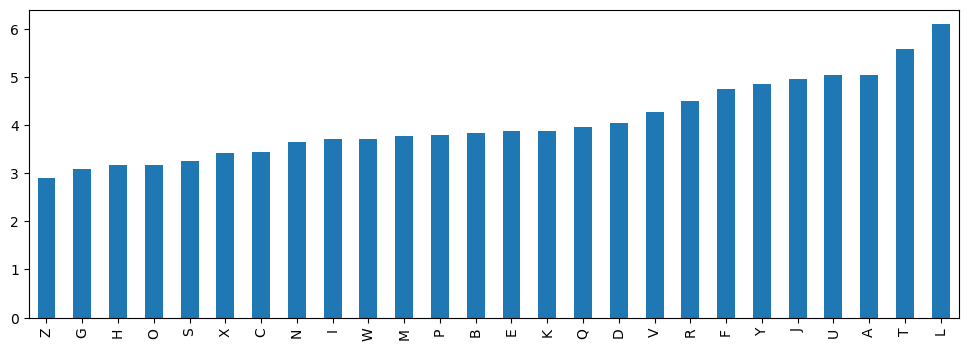

In [29]:
scores = {}

for letter in sorted(data["lettr"].unique()):
    corr_l = data[data["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global
    scores[letter] = np.linalg.norm(diff.values, ord="fro")   # norme de Frobenius

scores_series = pd.Series(scores).sort_values()
scores_series.plot(kind="bar", figsize=(12, 4))
plt.show()

Ainsi, nous remarquons que les lettres les plus structurellement atypiques sont : **L** , **T** et **A**.

A contrario, les lettres les plus proches du comportemement moyen sont : **Z** , **G** et **H**.

In [31]:
letters_extreme = scores_series.tail(3).index
letters_typical = scores_series.head(3).index

#### Les lettres "extrêmes"

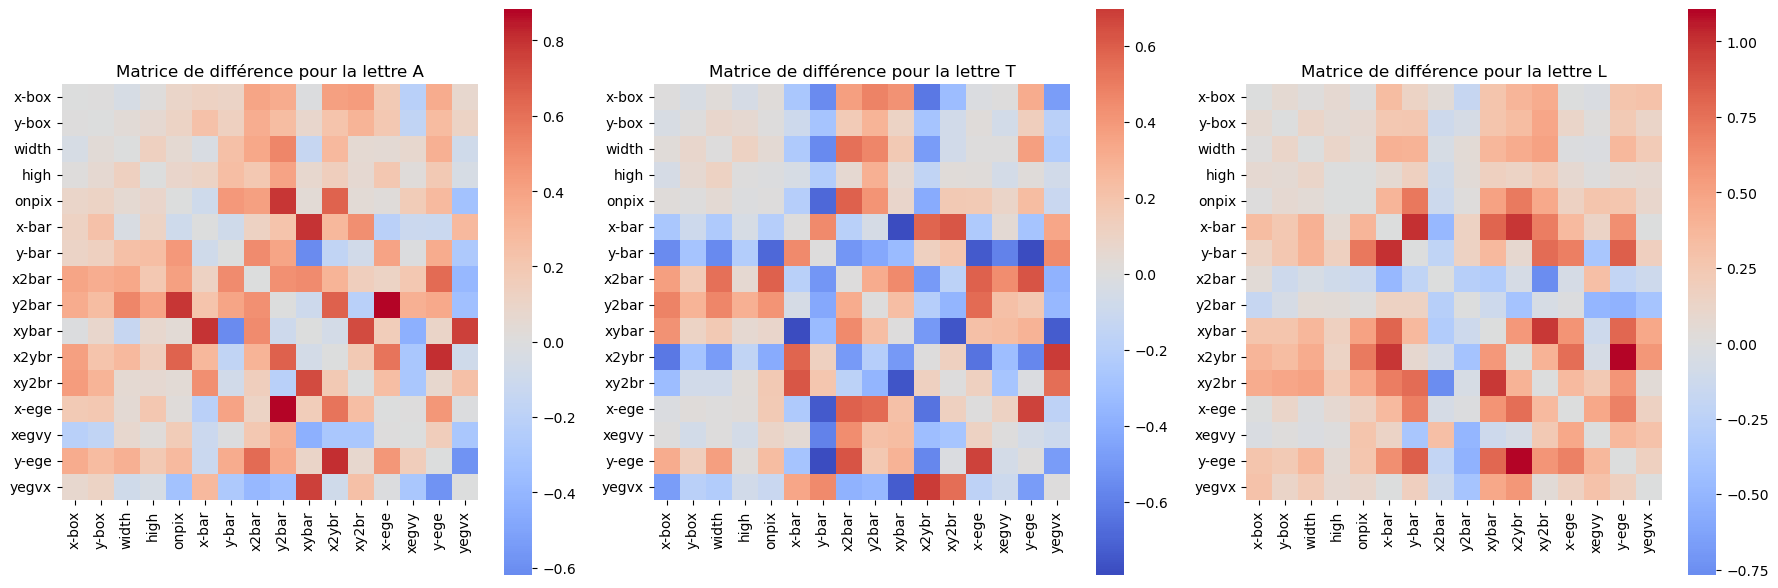

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, letter in zip(axes, letters_extreme):
    corr_l = data[data["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global
    
    sns.heatmap(
        diff,
        cmap="coolwarm",
        center=0,
        square=True,
        ax=ax
    )
    ax.set_title(f"Matrice de différence pour la lettre {letter}")

plt.tight_layout()
plt.show()


#### Lettres "typiques"

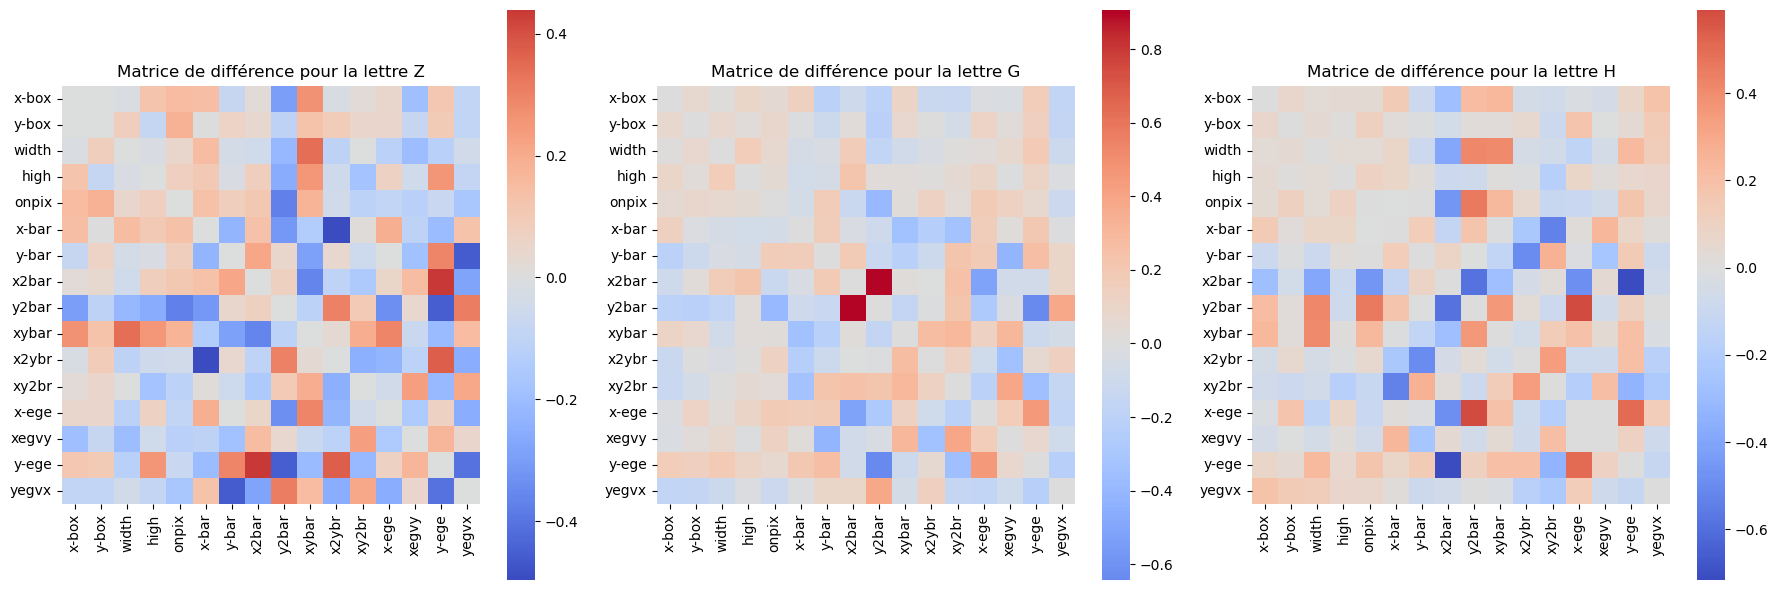

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, letter in zip(axes, letters_typical):
    corr_l = data[data["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global
    
    sns.heatmap(
        diff,
        cmap="coolwarm",
        center=0,
        square=True,
        ax=ax
    )
    ax.set_title(f"Matrice de différence pour la lettre {letter}")

plt.tight_layout()
plt.show()

Nous constatons que certaines variables liées à la taille et à la position : **x-box**, **y-box**, **width**, **high** et **onpix** qui présentent de fortes corrélations globales mais deviennent quasi indépendantes lorsque l’on conditionne par lettre. Ainsi, ces variables n’apportant pas d’information significative sur la structure interne des lettres, elles ont été exclues afin d’analyser plus finement les relations entre les variables morphologiques.

#### Retrait des variables : **x-box**, **y-box**, **width**, **high** et **onpix**

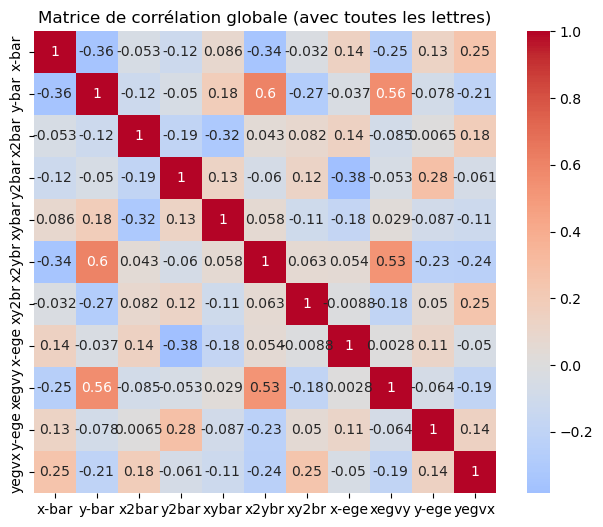

In [38]:
cut = ['x-box', 'y-box', 'width', 'high', 'onpix']

data_cut = data.drop(columns= cut)
corr_global2 = data_cut.drop(columns = "lettr").corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_global2,
    cmap="coolwarm",
    center=0,
    annot = True,
    square=True
)
plt.title("Matrice de corrélation globale (avec toutes les lettres)")
plt.show()

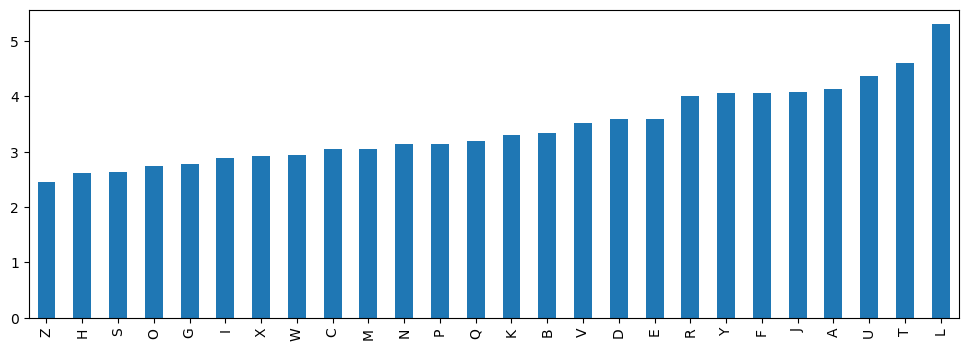

In [39]:
scores2 = {}

for letter in sorted(data_cut["lettr"].unique()):
    corr_l = data_cut[data_cut["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global2
    scores2[letter] = np.linalg.norm(diff.values, ord="fro")   # norme de Frobenius

scores_series2 = pd.Series(scores2).sort_values()
scores_series2.plot(kind="bar", figsize=(12, 4))
plt.show()

In [40]:
letters_extreme2 = scores_series2.tail(3).index
letters_typical2 = scores_series2.head(3).index

#### Lettres "extrêmes"

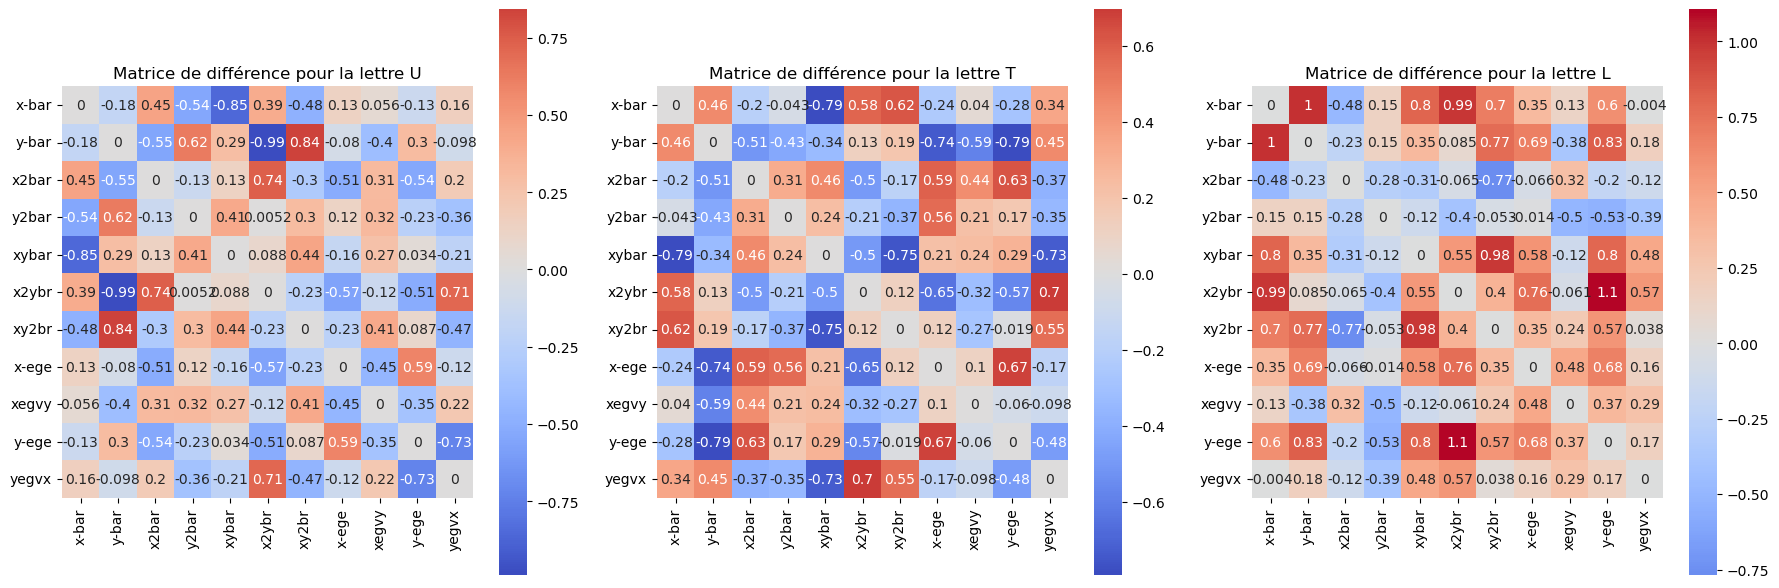

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, letter in zip(axes, letters_extreme2):
    corr_l = data_cut[data_cut["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global2
    
    sns.heatmap(
        diff,
        cmap="coolwarm",
        center=0,
        square=True,
        annot = True,
        ax=ax
    )
    ax.set_title(f"Matrice de différence pour la lettre {letter}")

plt.tight_layout()
plt.show()

#### Lettres "typiques"

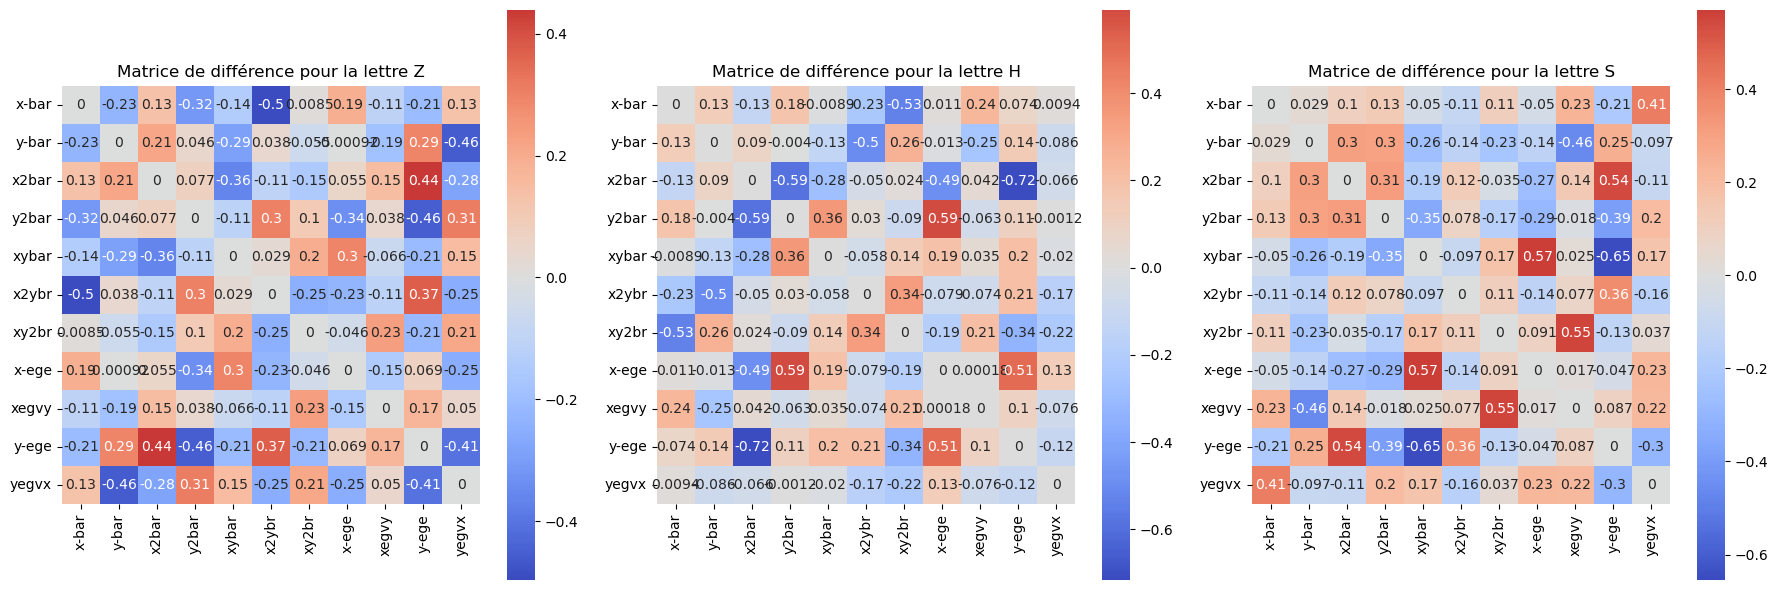

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, letter in zip(axes, letters_typical2):
    corr_l = data_cut[data_cut["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global2
    
    sns.heatmap(
        diff,
        cmap="coolwarm",
        center=0,
        square=True,
        annot = True,
        ax=ax
    )
    ax.set_title(f"Matrice de différence pour la lettre {letter}")

plt.tight_layout()
plt.show()

Remarque : Le retrait des variables liées à la taille et la position n’affecte pas la structure globale des corrélations ni les dépendances conditionnelles par lettre. En revanche, il modifie la mesure d’atypie basée sur la norme de Frobenius, révélant que certaines lettres étaient atypiques principalement en raison de caractéristiques globales, tandis que d’autres le sont du point de vue de leur structure interne.

### ACP

In [46]:
features = data.drop(columns="lettr").columns
corr_global = data.drop(columns="lettr").corr()

vectors = []
labels = []

for letter in sorted(data["lettr"].unique()):
    corr_l = data[data["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global
    
    # extraire le triangle inférieur (sans la diagonale)
    tril_idx = np.tril_indices_from(diff, k=-1)
    vectors.append(diff.values[tril_idx])
    labels.append(letter)

X_corr = np.vstack(vectors)

In [47]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_corr)

var_exp = pca.explained_variance_ratio_
var_exp

array([0.21632767, 0.12117787, 0.11213376, 0.09911566, 0.07695957,
       0.06287829, 0.05094369, 0.0335257 , 0.03161858])

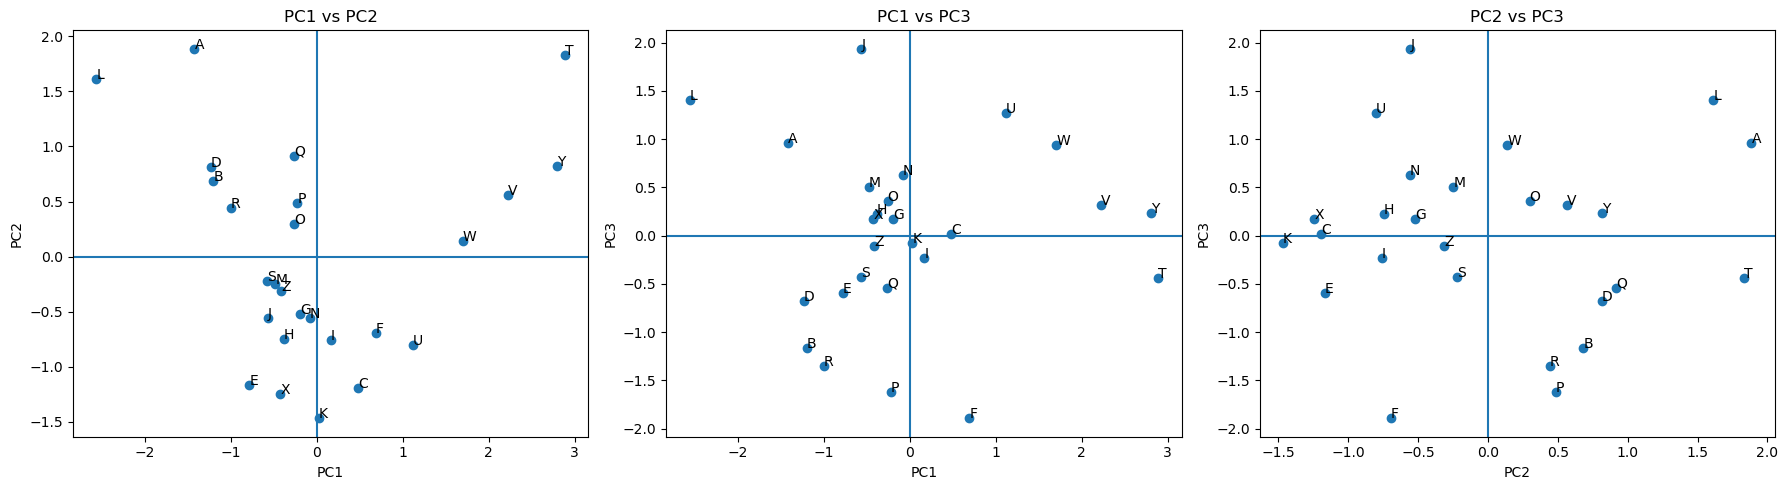

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

pairs = [
    (0, 1, "PC1", "PC2"),
    (0, 2, "PC1", "PC3"),
    (1, 2, "PC2", "PC3")
]

for ax, (i, j, xi, yj) in zip(axes, pairs):
    ax.scatter(X_pca[:, i], X_pca[:, j])
    
    for k, letter in enumerate(labels):
        ax.text(X_pca[k, i], X_pca[k, j], letter)
        
    ax.axhline(0)
    ax.axvline(0)
    ax.set_xlabel(xi)
    ax.set_ylabel(yj)
    ax.set_title(f"{xi} vs {yj}")

plt.tight_layout()
plt.show()


### ACP sans **x-box**, **y-box**, **width**, **high** et **onpix**

In [72]:
features2 = data_cut.drop(columns="lettr").columns
corr_global2 = data_cut.drop(columns="lettr").corr()

vectors = []
labels = []

for letter in sorted(data_cut["lettr"].unique()):
    corr_l = data_cut[data_cut["lettr"] == letter].drop(columns="lettr").corr()
    diff = corr_l - corr_global2
    
    # extraire le triangle inférieur (sans la diagonale)
    tril_idx = np.tril_indices_from(diff, k=-1)
    vectors.append(diff.values[tril_idx])
    labels.append(letter)

X_corr2 = np.vstack(vectors)

In [76]:
pca2 = PCA(n_components=9)
X_pca2 = pca2.fit_transform(X_corr2)

var_exp = pca2.explained_variance_ratio_
var_exp

array([0.21421976, 0.13170393, 0.11245986, 0.09320311, 0.08432951,
       0.05855245, 0.04758582, 0.03707814, 0.03452397])

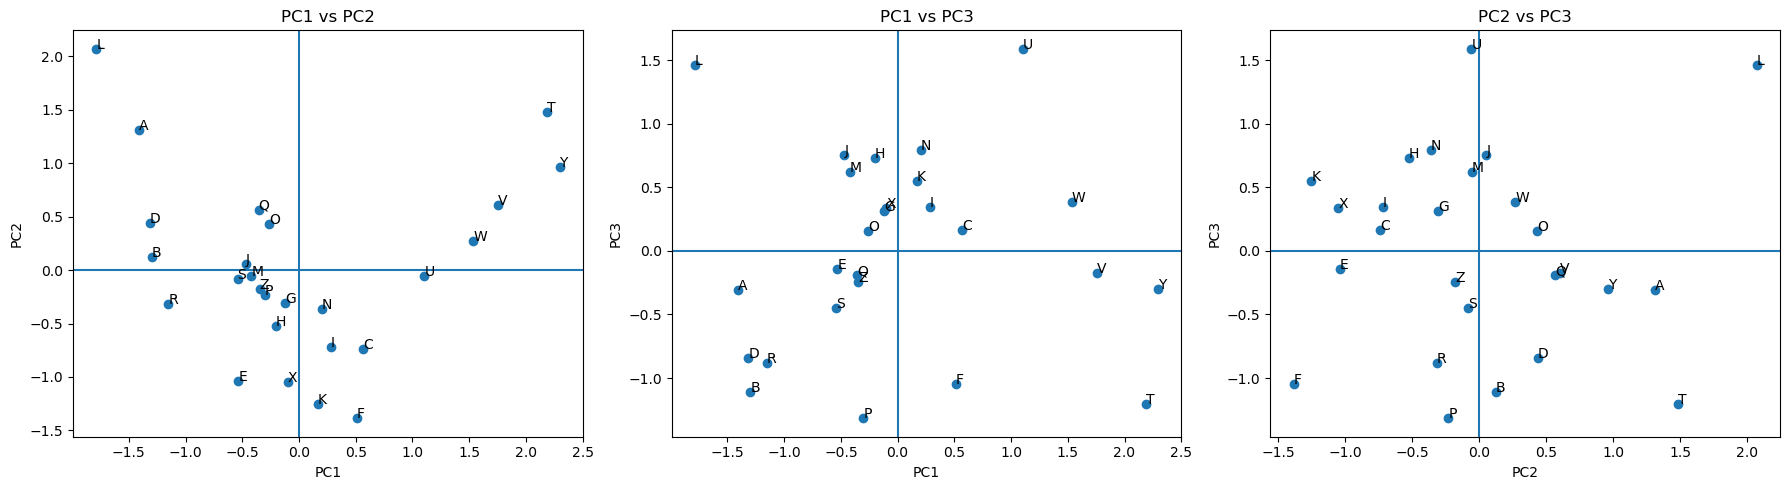

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

pairs = [
    (0, 1, "PC1", "PC2"),
    (0, 2, "PC1", "PC3"),
    (1, 2, "PC2", "PC3")
]

for ax, (i, j, xi, yj) in zip(axes, pairs):
    ax.scatter(X_pca2[:, i], X_pca2[:, j])
    
    for k, letter in enumerate(labels):
        ax.text(X_pca2[k, i], X_pca2[k, j], letter)
        
    ax.axhline(0)
    ax.axvline(0)
    ax.set_xlabel(xi)
    ax.set_ylabel(yj)
    ax.set_title(f"{xi} vs {yj}")

plt.tight_layout()
plt.show()


### CAH

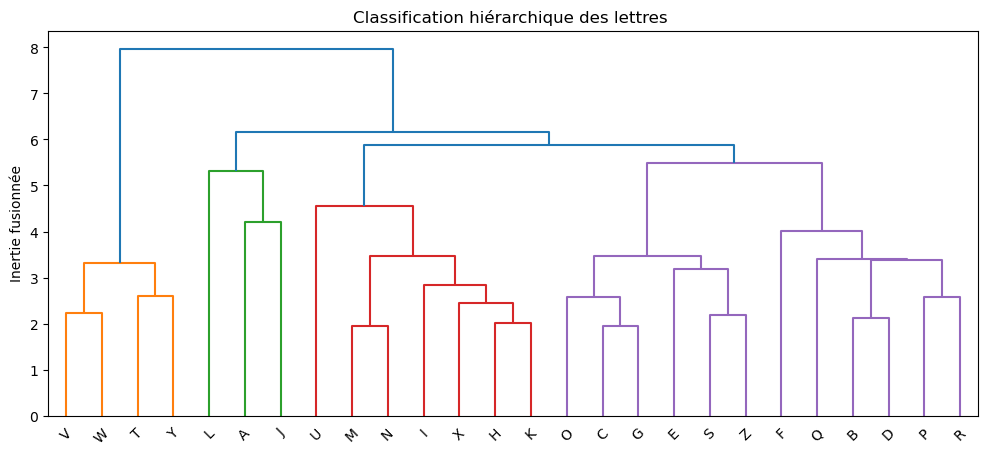

In [50]:
D = squareform(pdist(X_corr, metric="euclidean"))
Z = linkage(X_corr, method="ward")

plt.figure(figsize=(12, 5))
dendrogram(Z, labels=labels)
plt.title("Classification hiérarchique des lettres ")
plt.ylabel("Inertie fusionnée")
plt.show()

In [51]:
clusters = fcluster(Z, t=4, criterion="maxclust")

pd.DataFrame({
    "Lettre": labels,
    "Cluster": clusters
}).sort_values("Cluster")


,Lettre,Cluster
22,W,1
21,V,1
19,T,1
24,Y,1
0,A,2
11,L,2
9,J,2
23,X,3
20,U,3
13,N,3


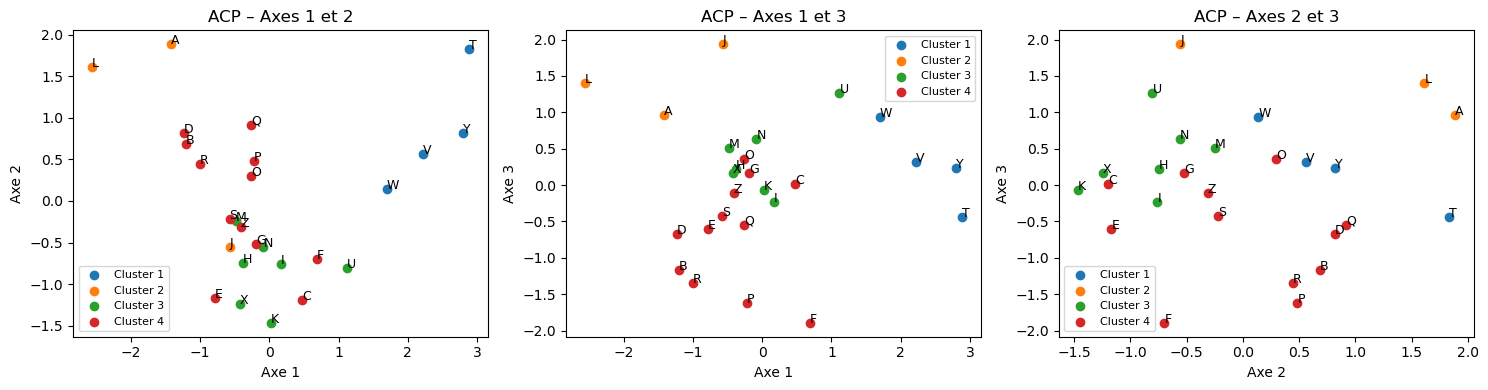

In [87]:
unique_clusters = np.unique(clusters)

axes_pairs = [(0, 1), 
              (0, 2), 
              (1, 2) 
             ]

titles = [ "ACP – Axes 1 et 2", 
           "ACP – Axes 1 et 3", 
           "ACP – Axes 2 et 3"
         ]

plt.figure(figsize=(15, 4))

for i, ((a, b), title) in enumerate(zip(axes_pairs, titles), start=1):
    plt.subplot(1, 3, i)

    for c in unique_clusters:
        mask = clusters == c
        plt.scatter(
            X_pca[mask, a],
            X_pca[mask, b],
            label=f"Cluster {c}"
        )

    for j, l in enumerate(labels):
        plt.text(X_pca[j, a], X_pca[j, b], l, fontsize=9)

    plt.xlabel(f"Axe {a+1}")
    plt.ylabel(f"Axe {b+1}")
    plt.title(title)

    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

### CAH sans **x-box**, **y-box**, **width**, **high** et **onpix**

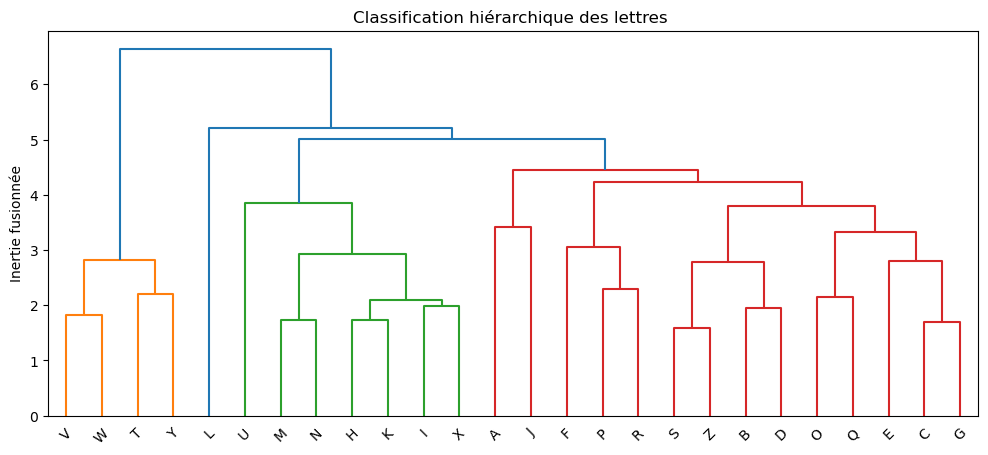

In [94]:
D2 = squareform(pdist(X_corr2, metric="euclidean"))
Z2 = linkage(X_corr2, method="ward")

plt.figure(figsize=(12, 5))
dendrogram(Z2, labels=labels)
plt.title("Classification hiérarchique des lettres ")
plt.ylabel("Inertie fusionnée")
plt.show()

In [98]:
clusters = fcluster(Z2, t=4, criterion="maxclust")

pd.DataFrame({
    "Lettre": labels,
    "Cluster": clusters
}).sort_values("Cluster")

,Lettre,Cluster
22,W,1
21,V,1
19,T,1
24,Y,1
12,M,2
23,X,2
20,U,2
7,H,2
8,I,2
10,K,2


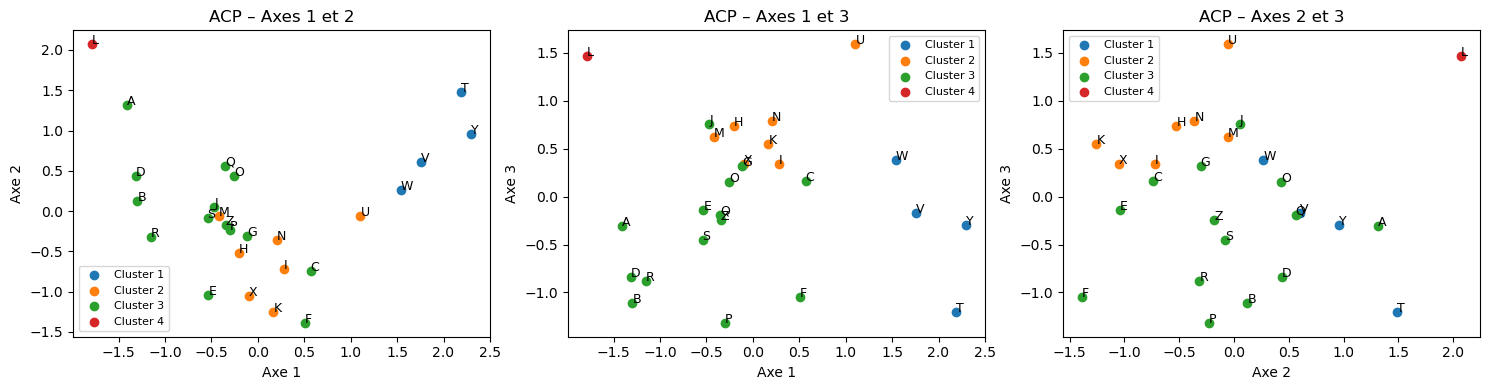

In [100]:
unique_clusters = np.unique(clusters)

axes_pairs = [(0, 1), 
              (0, 2), 
              (1, 2) 
             ]

titles = [ "ACP – Axes 1 et 2", 
           "ACP – Axes 1 et 3", 
           "ACP – Axes 2 et 3"
         ]

plt.figure(figsize=(15, 4))

for i, ((a, b), title) in enumerate(zip(axes_pairs, titles), start=1):
    plt.subplot(1, 3, i)

    for c in unique_clusters:
        mask = clusters == c
        plt.scatter(
            X_pca2[mask, a],
            X_pca2[mask, b],
            label=f"Cluster {c}"
        )

    for j, l in enumerate(labels):
        plt.text(X_pca2[j, a], X_pca2[j, b], l, fontsize=9)

    plt.xlabel(f"Axe {a+1}")
    plt.ylabel(f"Axe {b+1}")
    plt.title(title)

    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()